In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
scenarios = {
    1:
    {
    # obszar sieci 
    "areaX" : 750,
    "areaY" : 750,
    # liczba bramek
    "numberOfGateways" : 1,
    # liczba węzłów
    "numberOfNodes" : [200, 600, 1000],
    # moment rozpoczęcia generowania wiadomości
    "timeToFirstPacket" : 600,
    # interwał z jakim są generowane kolejne pakiety
    "timeToNextPacket" : 100,
    # sigma  w  modelu  LoRaLogNormalShadowing
    "sigma" : 2,
    },
    2:
    {
    # obszar sieci 
    "areaX" : 750,
    "areaY" : 750,
    # liczba bramek
    "numberOfGateways" : 2,
    # liczba węzłów
    "numberOfNodes" : [200, 600, 1000],
    # moment rozpoczęcia generowania wiadomości
    "timeToFirstPacket" : 600,
    # interwał z jakim są generowane kolejne pakiety
    "timeToNextPacket" : 100,
    # sigma  w  modelu  LoRaLogNormalShadowing
    "sigma" : 2,
    },
    3:
    {
    # obszar sieci 
    "areaX" : 750,
    "areaY" : 750,
    # liczba bramek
    "numberOfGateways" : 1,
    # liczba węzłów
    "numberOfNodes" : [200, 600, 1000],
    # moment rozpoczęcia generowania wiadomości
    "timeToFirstPacket" : 600,
    # interwał z jakim są generowane kolejne pakiety
    "timeToNextPacket" : 100,
    # sigma  w  modelu  LoRaLogNormalShadowing
    "sigma" : 5,
    },
    4:
    {
    # obszar sieci 
    "areaX" : 750,
    "areaY" : 750,
    # liczba bramek
    "numberOfGateways" : 2,
    # liczba węzłów
    "numberOfNodes" : [200, 600, 1000],
    # moment rozpoczęcia generowania wiadomości
    "timeToFirstPacket" : 600,
    # interwał z jakim są generowane kolejne pakiety
    "timeToNextPacket" : 100,
    # sigma  w  modelu  LoRaLogNormalShadowing
    "sigma" : 5,
    },
    5:
    {
    # obszar sieci 
    "areaX" : 10000,
    "areaY" : 10000,
    # liczba bramek
    "numberOfGateways" : 1,
    # liczba węzłów
    "numberOfNodes" : [200, 600, 1000],
    # moment rozpoczęcia generowania wiadomości
    "timeToFirstPacket" : 600,
    # interwał z jakim są generowane kolejne pakiety
    "timeToNextPacket" : 100,
    # sigma  w  modelu  LoRaLogNormalShadowing
    "sigma" : 2,
    },
    6:
    {
    # obszar sieci 
    "areaX" : 10000,
    "areaY" : 10000,
    # liczba bramek
    "numberOfGateways" : 2,
    # liczba węzłów
    "numberOfNodes" : [200, 600, 1000],
    # moment rozpoczęcia generowania wiadomości
    "timeToFirstPacket" : 600,
    # interwał z jakim są generowane kolejne pakiety
    "timeToNextPacket" : 100,
    # sigma  w  modelu  LoRaLogNormalShadowing
    "sigma" : 2,
    },
    7:
    {
    # obszar sieci 
    "areaX" : 10000,
    "areaY" : 10000,
    # liczba bramek
    "numberOfGateways" : 1,
    # liczba węzłów
    "numberOfNodes" : [200, 600, 1000],
    # moment rozpoczęcia generowania wiadomości
    "timeToFirstPacket" : 600,
    # interwał z jakim są generowane kolejne pakiety
    "timeToNextPacket" : 100,
    # sigma  w  modelu  LoRaLogNormalShadowing
    "sigma" : 5,
    },
    8:
    {
    # obszar sieci 
    "areaX" : 10000,
    "areaY" : 10000,
    # liczba bramek
    "numberOfGateways" : 2,
    # liczba węzłów
    "numberOfNodes" : [200, 600, 1000],
    # moment rozpoczęcia generowania wiadomości
    "timeToFirstPacket" : 600,
    # interwał z jakim są generowane kolejne pakiety
    "timeToNextPacket" : 100,
    # sigma  w  modelu  LoRaLogNormalShadowing
    "sigma" : 5,
    },
}

In [28]:
df = pd.DataFrame({'name': [],
                   'scenario_nr' : [],
                   'nr_of_nodes' : [],
                   'energy': [],
                   'packets_rcv': [],
                   'packets_snt': [],
                   'ratio': [],
                  })
for scenario in scenarios:
    numbersOfNodes = scenarios[scenario]["numberOfNodes"]
    for numberOfNodes in numbersOfNodes:
        csv = pd.read_csv(f"C:/Users/Przemyslaw/OneDrive - Wojskowa Akademia Techniczna/studia/Rok mgr/II semestr/Sensoryczne/Lab/Przemo/results/scenario-{scenario}-{numberOfNodes}/measurements.csv", index_col=0, parse_dates=True)
        tmp = csv[csv.module.str.contains('energyConsumer', regex= True, na=False)]
        energy = tmp.value.describe()["mean"]
        tmp = csv[csv.name.str.contains('LoRa_AppPacketSent', regex= True, na=False)]
        packets_snt = tmp.value.sum()
        tmp = csv[csv.name.str.contains('counterUnique', regex= True, na=False)]
        packets_rcv = tmp.value.sum()
        ratio = packets_rcv/packets_snt
        name = f'scenario-{scenario}-{numberOfNodes}'
        df1 = pd.DataFrame({
            'name': [name],
            'scenario_nr' : [scenario],
            'nr_of_nodes' : [numberOfNodes],
            'model': [scenarios[scenario]["sigma"]],
            'number_of_gateways': [scenarios[scenario]["numberOfGateways"]],
            'areaX': [scenarios[scenario]["areaX"]],
            'energy': [energy],
            'packets_rcv': [packets_rcv],
            'packets_snt': [packets_snt],
            'ratio': [ratio],
            })
        df=df.append(df1, ignore_index=True)

In [29]:
df

,name,scenario_nr,nr_of_nodes,energy,packets_rcv,packets_snt,ratio,model,number_of_gateways,areaX
0,scenario-1-200,1.0,200.0,32.712952,70.0,200.0,0.350000,5.0,1.0,750.0
1,scenario-1-600,1.0,600.0,34.529525,160.0,600.0,0.266667,5.0,1.0,750.0
2,scenario-1-1000,1.0,1000.0,34.909088,201.0,1000.0,0.201000,5.0,1.0,750.0
3,scenario-2-200,2.0,200.0,32.944070,82.0,200.0,0.410000,2.0,2.0,750.0
4,scenario-2-600,2.0,600.0,33.618167,305.0,600.0,0.508333,2.0,2.0,750.0
5,scenario-2-1000,2.0,1000.0,33.764444,483.0,1000.0,0.483000,2.0,2.0,750.0
6,scenario-3-200,3.0,200.0,32.712952,70.0,200.0,0.350000,5.0,1.0,750.0
7,scenario-3-600,3.0,600.0,34.526064,154.0,600.0,0.256667,5.0,1.0,750.0
8,scenario-3-1000,3.0,1000.0,34.979110,214.0,1000.0,0.214000,5.0,1.0,750.0
9,scenario-4-200,4.0,200.0,32.740081,82.0,200.0,0.410000,5.0,2.0,750.0


In [81]:
# df.to_csv("file_name.csv", encoding='utf-8', index=False)

In [89]:
df[df["nr_of_nodes"]==numbersOfNodes[2]]

,name,scenario_nr,nr_of_nodes,energy,packets_rcv,packets_snt,ratio,model,number_of_gateways,areaX
2,scenario-1-1000,1.0,1000.0,34.909088,201.0,1000.0,0.201,5.0,1.0,750.0
5,scenario-2-1000,2.0,1000.0,33.764444,483.0,1000.0,0.483,2.0,2.0,750.0
8,scenario-3-1000,3.0,1000.0,34.979110,214.0,1000.0,0.214,5.0,1.0,750.0
11,scenario-4-1000,4.0,1000.0,33.543540,505.0,1000.0,0.505,5.0,2.0,750.0
14,scenario-5-1000,5.0,1000.0,35.707025,1.0,1000.0,0.001,2.0,1.0,10000.0
17,scenario-6-1000,6.0,1000.0,35.615532,14.0,1000.0,0.014,2.0,2.0,10000.0
20,scenario-7-1000,7.0,1000.0,35.866890,4.0,1000.0,0.004,5.0,1.0,10000.0
23,scenario-8-1000,8.0,1000.0,35.767508,23.0,1000.0,0.023,5.0,2.0,10000.0


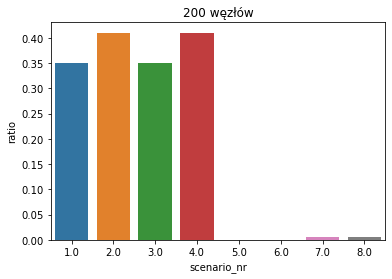

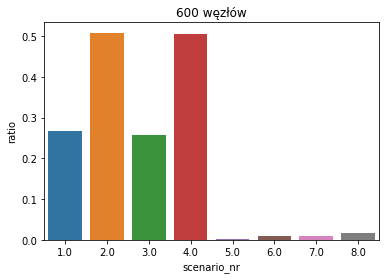

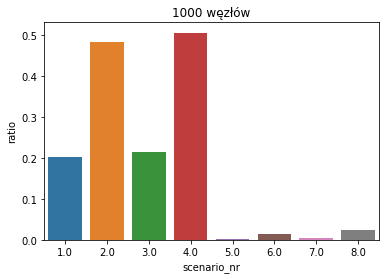

In [82]:
for numberOfNodes in numbersOfNodes:
    ax = sns.barplot(data=df[df["nr_of_nodes"]==numberOfNodes], x="scenario_nr", y="ratio").set_title(f"{numberOfNodes} węzłów")
    plt.show()

In [40]:
df[df["scenario_nr"]==1]

,name,scenario_nr,nr_of_nodes,energy,packets_rcv,packets_snt,ratio,model,number_of_gateways,areaX
0,scenario-1-200,1.0,200.0,32.712952,70.0,200.0,0.350000,5.0,1.0,750.0
1,scenario-1-600,1.0,600.0,34.529525,160.0,600.0,0.266667,5.0,1.0,750.0
2,scenario-1-1000,1.0,1000.0,34.909088,201.0,1000.0,0.201000,5.0,1.0,750.0


Text(0.5, 1.0, 'scenariusz')

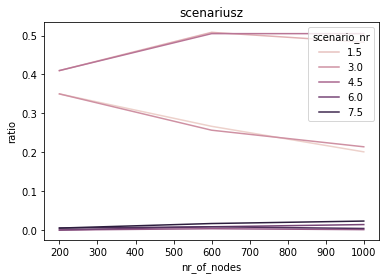

In [85]:
sns.lineplot(data=df, x="nr_of_nodes", y="ratio", hue="scenario_nr").set_title(f"scenariusz")


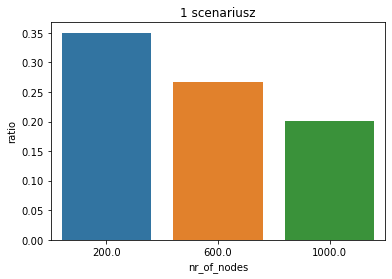

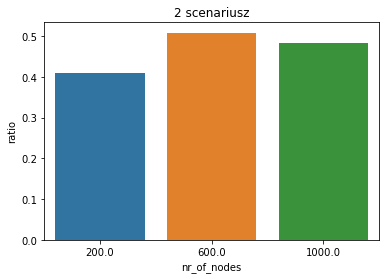

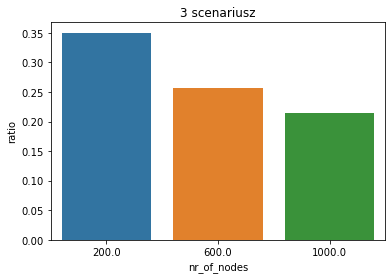

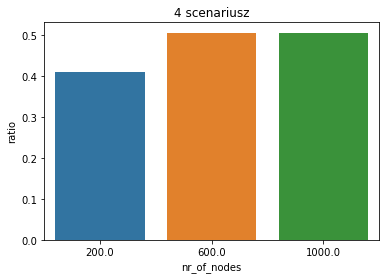

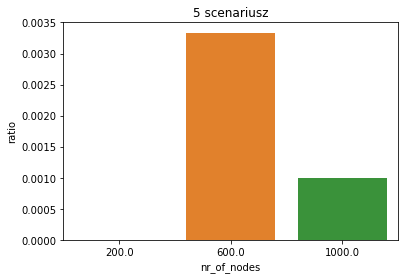

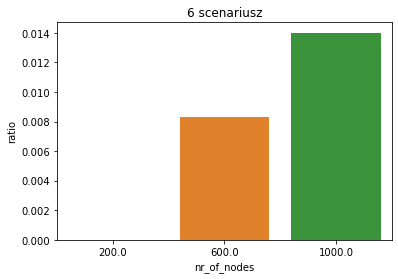

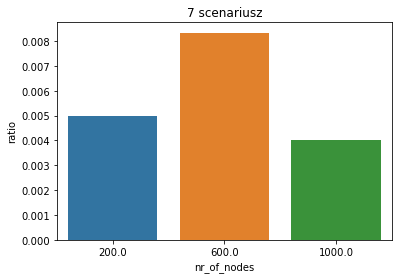

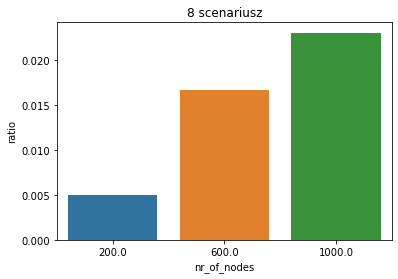

In [84]:
for scenario in scenarios:
    ax = sns.barplot(data=df[df["scenario_nr"]==scenario], x="nr_of_nodes", y="ratio").set_title(f"{scenario} scenariusz")
    plt.show()

In [46]:
df[(df["areaX"]==750) & (df["number_of_gateways"]==1)]

,name,scenario_nr,nr_of_nodes,energy,packets_rcv,packets_snt,ratio,model,number_of_gateways,areaX
0,scenario-1-200,1.0,200.0,32.712952,70.0,200.0,0.350000,5.0,1.0,750.0
1,scenario-1-600,1.0,600.0,34.529525,160.0,600.0,0.266667,5.0,1.0,750.0
2,scenario-1-1000,1.0,1000.0,34.909088,201.0,1000.0,0.201000,5.0,1.0,750.0
6,scenario-3-200,3.0,200.0,32.712952,70.0,200.0,0.350000,5.0,1.0,750.0
7,scenario-3-600,3.0,600.0,34.526064,154.0,600.0,0.256667,5.0,1.0,750.0
8,scenario-3-1000,3.0,1000.0,34.979110,214.0,1000.0,0.214000,5.0,1.0,750.0


In [47]:
df[(df["areaX"]==750) & (df["number_of_gateways"]==2)]

,name,scenario_nr,nr_of_nodes,energy,packets_rcv,packets_snt,ratio,model,number_of_gateways,areaX
3,scenario-2-200,2.0,200.0,32.944070,82.0,200.0,0.410000,2.0,2.0,750.0
4,scenario-2-600,2.0,600.0,33.618167,305.0,600.0,0.508333,2.0,2.0,750.0
5,scenario-2-1000,2.0,1000.0,33.764444,483.0,1000.0,0.483000,2.0,2.0,750.0
9,scenario-4-200,4.0,200.0,32.740081,82.0,200.0,0.410000,5.0,2.0,750.0
10,scenario-4-600,4.0,600.0,33.621040,303.0,600.0,0.505000,5.0,2.0,750.0
11,scenario-4-1000,4.0,1000.0,33.543540,505.0,1000.0,0.505000,5.0,2.0,750.0


In [87]:
df[(df["areaX"]==10000) & (df["number_of_gateways"]==1)]

,name,scenario_nr,nr_of_nodes,energy,packets_rcv,packets_snt,ratio,model,number_of_gateways,areaX
12,scenario-5-200,5.0,200.0,33.567079,0.0,200.0,0.000000,2.0,1.0,10000.0
13,scenario-5-600,5.0,600.0,35.420091,2.0,600.0,0.003333,2.0,1.0,10000.0
14,scenario-5-1000,5.0,1000.0,35.707025,1.0,1000.0,0.001000,2.0,1.0,10000.0
18,scenario-7-200,7.0,200.0,33.483623,1.0,200.0,0.005000,5.0,1.0,10000.0
19,scenario-7-600,7.0,600.0,35.417732,5.0,600.0,0.008333,5.0,1.0,10000.0
20,scenario-7-1000,7.0,1000.0,35.866890,4.0,1000.0,0.004000,5.0,1.0,10000.0


<AxesSubplot:xlabel='nr_of_nodes', ylabel='energy'>

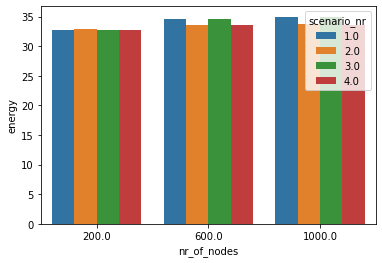

In [60]:
sns.barplot(data=df.head(12), x="nr_of_nodes", y="energy", hue="scenario_nr")

Text(0.5, 0, 'Liczba węzłów')

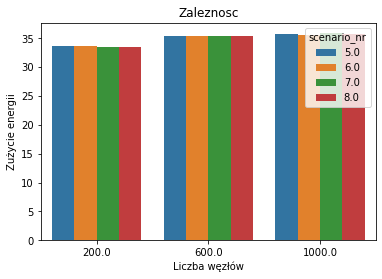

In [71]:
ax = sns.barplot(data=df.tail(12), x="nr_of_nodes", y="energy", hue="scenario_nr")

ax.set_title("Zaleznosc")
ax.set_ylabel("Zużycie energii")
ax.set_xlabel("Liczba węzłów")


<AxesSubplot:xlabel='nr_of_nodes', ylabel='ratio'>

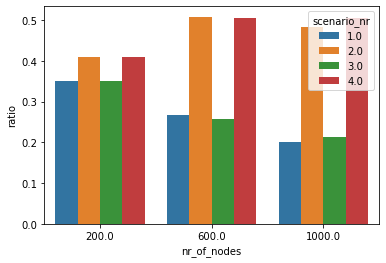

In [55]:
sns.barplot(data=df.head(12), x="nr_of_nodes", y="ratio", hue="scenario_nr")

<AxesSubplot:xlabel='nr_of_nodes', ylabel='ratio'>

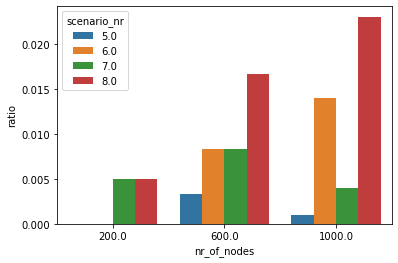

In [59]:
sns.barplot(data=df.tail(12), x="nr_of_nodes", y="ratio", hue="scenario_nr")